In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# Reading dataset
df = pd.read_csv("data.csv")
# describe the dataset before cleaning
print("before cleaning")
print(df.describe())
# cleaning the data
df.drop_duplicates(inplace=True)
median = df['Calories'].median()
df['Calories'].fillna(median, inplace=True)
# after cleaning
print("after cleaning")
print(df.describe())

before cleaning
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000
after cleaning
         Duration       Pulse    Maxpulse     Calories
count  162.000000  162.000000  162.000000   162.000000
mean    64.197531  107.709877  134.265432   377.593210
std     43.151882   14.711588   16.471618   267.291955
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   255.075000
50%     60.000000  105.500000  131.000000   320.400000
75%     60.000000  111.000000  141.000000   386.700000
max    300.000000  159.000000  184

In [5]:
# adding a new column (categories for calories: few, normal or high)
q_1 = df['Calories'].quantile(q=0.25)
q_2 = df['Calories'].median()
q_3 = df['Calories'].quantile(q=0.75)
q_4 = df['Calories'].max()
df['Category'] = pd.cut(x=df['Calories'], bins=[0, q_1, q_3, q_4], labels=['few', 'normal', 'high'])
print(df.info())
print(df.groupby(['Category']).mean())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 168
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Duration  162 non-null    int64   
 1   Pulse     162 non-null    int64   
 2   Maxpulse  162 non-null    int64   
 3   Calories  162 non-null    float64 
 4   Category  162 non-null    category
dtypes: category(1), float64(1), int64(3)
memory usage: 6.6 KB
None
            Duration       Pulse    Maxpulse    Calories
Category                                                
few        35.000000  106.951220  130.146341  185.634146
normal     55.125000  108.725000  135.737500  318.951250
high      111.097561  106.487805  135.512195  683.975610


In [6]:
# applying label encoding on category feature
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['Category'])
print(integer_encoded)
#Replace categories values with encoded labels
df["Category"].replace(to_replace=df["Category"].tolist(), value=integer_encoded, inplace = True)
df.head()

[1 1 2 2 1 2 2 0 0 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 2 0 0 2 2 2 0 0 2 0 2 1 2
 2 2 1 1 2 1 2 2 1 2 1 2 1 0 1 1 2 0 2 1 1 1 2 0 1 1 1 0 1 1 1 1 2 1 0 2 1
 1 2 2 0 1 0 2 0 1 0 0 1 2 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 2 2 0 2 2 1
 2 2 2 0 0 2 2 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 0 1 2 0 2 1 2 1 2 0 1 2 2 2 2
 2 2 2 2 0 0 2 2 2 2 2 2 2 2]


,Duration,Pulse,Maxpulse,Calories,Category
0,60,110,130,409.1,1
1,60,117,145,479.0,1
2,60,103,135,340.0,2
3,45,109,175,282.4,2
4,45,117,148,406.0,1


          Duration     Pulse  Maxpulse  Calories  Category
Duration  1.000000 -0.162098  0.003578  0.922754  0.081476
Pulse    -0.162098  1.000000  0.787035  0.018594  0.056952
Maxpulse  0.003578  0.787035  1.000000  0.196884  0.129821
Calories  0.922754  0.018594  0.196884  1.000000  0.088722
Category  0.081476  0.056952  0.129821  0.088722  1.000000


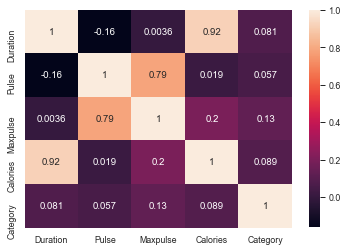

In [7]:
# set the general style of the plots
sns.set(style='white', context='paper', palette='deep')
# print the Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)
# Visualizing correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

Correlation between Duration and Category: 0.08
Independent t-test: 18.56604980653306 7.977320437537995e-53


Text(0.5, 1.0, 'Independent T-Test')

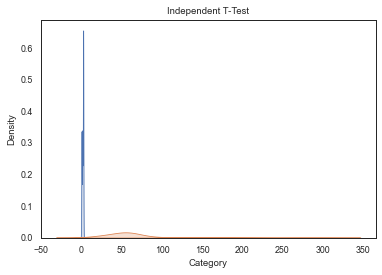

In [8]:
# print the correlation coefficient from the matrix
corr_coef = np.corrcoef(df["Duration"], df["Category"])[0, 1]
print("Correlation between Duration and Category:", round(corr_coef, 2))

# with t-test we check if the mean of the two groups are truly different
ttest, pval = stats.ttest_ind(df["Duration"], df["Category"])
print("Independent t-test:", ttest, pval)

sns.kdeplot(df["Category"], shade=True)
sns.kdeplot(df["Duration"], shade=True)
plt.title("Independent T-Test")

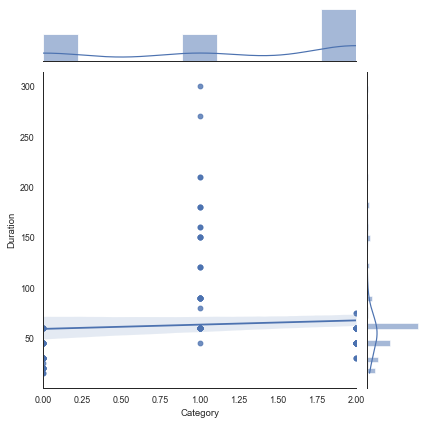

In [9]:
#Analysing correlation between Calories and Duration
sns.jointplot(kind="reg", x="Category", y="Duration", data=df)
plt.show()

In [47]:
# preparing the data

# Reading dataset
df = pd.read_csv("data.csv")
# cleaning the data
df.drop_duplicates(inplace=True)
median = df['Calories'].median()
df['Calories'].fillna(median, inplace=True)

# adding a new column (categories for calories: few, normal or high)
q_1 = df['Calories'].quantile(q=0.25)
q_3 = df['Calories'].quantile(q=0.75)
q_4 = df['Calories'].max()
df['Category'] = pd.cut(x=df['Calories'], bins=[0, q_1, q_3, q_4], labels=['few', 'normal', 'high'])
# reset the index after data cleaning 
# because one-hot encoding maps values by index
df.reset_index(inplace=True, drop=True)

In [48]:
# applying one-hot encoder
from sklearn.preprocessing import LabelEncoder
label_encoded = label_encoder.fit_transform(df['Category'])
label_reshaped = label_encoded.reshape(len(label_encoded), 1)

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop='first', categories='auto')
onehot_encoded = onehot_encoder.fit_transform(label_reshaped)

onehotencoder_df = pd.DataFrame(onehot_encoded)
df = df.join(onehotencoder_df)
df.drop(columns=['Category'], inplace=True)
print(df)

     Duration  Pulse  Maxpulse  Calories    0    1
0          60    110       130     409.1  1.0  0.0
1          60    117       145     479.0  1.0  0.0
2          60    103       135     340.0  0.0  1.0
3          45    109       175     282.4  0.0  1.0
4          45    117       148     406.0  1.0  0.0
..        ...    ...       ...       ...  ...  ...
157        60    105       140     290.8  0.0  1.0
158        60    110       145     300.0  0.0  1.0
159        60    115       145     310.2  0.0  1.0
160        75    120       150     320.4  0.0  1.0
161        75    125       150     330.4  0.0  1.0

[162 rows x 6 columns]


          Duration     Pulse  Maxpulse  Calories         0         1
Duration  1.000000 -0.162098  0.003578  0.922754  0.634625 -0.208311
Pulse    -0.162098  1.000000  0.787035  0.018594 -0.048504  0.068366
Maxpulse  0.003578  0.787035  1.000000  0.196884  0.044197  0.088547
Calories  0.922754  0.018594  0.196884  1.000000  0.669301 -0.217373
0         0.634625 -0.048504  0.044197  0.669301  1.000000 -0.574960
1        -0.208311  0.068366  0.088547 -0.217373 -0.574960  1.000000


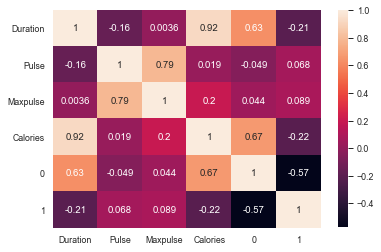

In [56]:
# set the general style of the plots
sns.set(style='white', context='paper', palette='deep')
# print the Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)
# Visualizing correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [58]:
# print the correlation coefficient from the matrix
corr_coef = np.corrcoef(df["Duration"], df[0])[0, 1]
print("Correlation between Duration and calories_few:", round(corr_coef, 2))

corr_coef = np.corrcoef(df["Duration"], df[1])[0, 1]
print("Correlation between Duration and calories_high:", round(corr_coef, 2))

# with t-test we check if the mean of the two groups are truly different
ttest, pval = stats.ttest_ind(df["Duration"], df[0])
print("Independent t-test 0:", ttest, pval)
ttest, pval = stats.ttest_ind(df["Duration"], df[1])
print("Independent t-test 1:", ttest, pval)


Correlation between Duration and calories_few: 0.63
Correlation between Duration and calories_high: -0.21
Independent t-test: 18.85985716687065 5.685983389448324e-54
Independent t-test: 18.788543521705844 1.0792946813707245e-53


Text(0.5, 1.0, 'Independent T-Test')

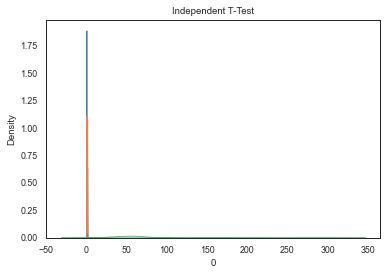

In [59]:
sns.kdeplot(df[0], shade=True)
sns.kdeplot(df[1], shade=True)
sns.kdeplot(df["Duration"], shade=True)
plt.title("Independent T-Test")

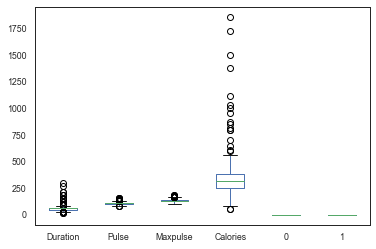

In [60]:
#Boxplot graph of all columns
df.plot(kind='box')
plt.show()

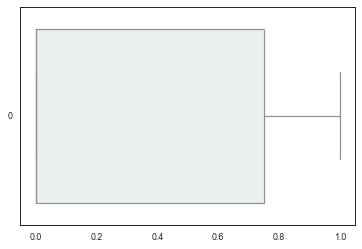

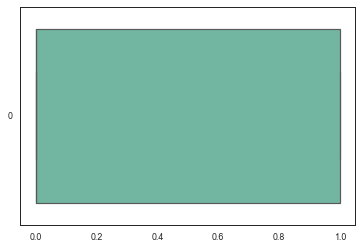

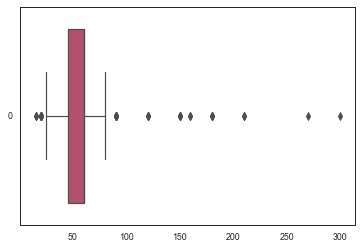

In [62]:
#Distribution of data in each class
cals_few = df[0]
cals_high = df[1]
durs = df["Duration"]

ax = sns.boxplot(data=cals_few, orient="h", palette="light:#5A9")
plt.show()
ax = sns.boxplot(data=cals_high, orient="h", palette="Set2")
plt.show()
ax = sns.boxplot(data=durs, orient="h", palette="flare")
plt.show()

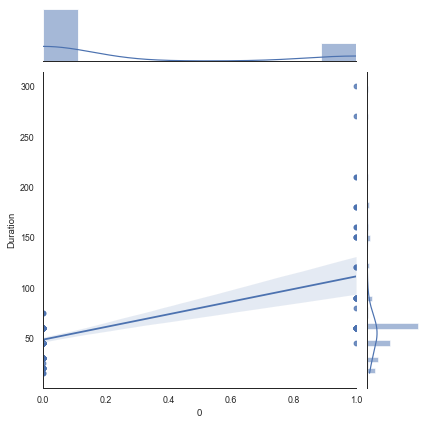

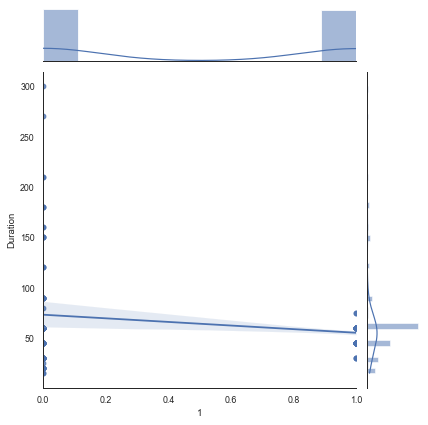

In [63]:
#Analysing correlation between Calories and Duration
sns.jointplot(kind="reg", x=0, y="Duration", data=df)
plt.show()
sns.jointplot(kind="reg", x=1, y="Duration", data=df)
plt.show()

In [84]:
# preparing data
# Reading dataset
df = pd.read_csv("data.csv")
# cleaning the data
df.drop_duplicates(inplace=True)
median = df['Calories'].median()
df['Calories'].fillna(median, inplace=True)

# adding a new column (categories for calories: few, normal or high)
q_1 = df['Calories'].quantile(q=0.25)
q_3 = df['Calories'].quantile(q=0.75)
q_4 = df['Calories'].max()
df['Category'] = pd.cut(x=df['Calories'], bins=[0, q_1, q_3, q_4], labels=['few', 'normal', 'high'])
# reset the index after data cleaning 
# because one-hot encoding maps values by index
df.reset_index(inplace=True, drop=True)

In [85]:
# Applying ordinal encoding
calories_dict = {'few': 1, 'normal': 2, 'high': 3}
# setting the new column as int64 to make show in the heatmap below
df['Calories_Ordinal'] = df.Category.map(calories_dict).astype('int64')
df.drop(columns=['Category'], inplace=True)
df

,Duration,Pulse,Maxpulse,Calories,Calories_Ordinal
0,60,110,130,409.1,3
1,60,117,145,479.0,3
2,60,103,135,340.0,2
3,45,109,175,282.4,2
4,45,117,148,406.0,3
...,...,...,...,...,...
157,60,105,140,290.8,2
158,60,110,145,300.0,2
159,60,115,145,310.2,2
160,75,120,150,320.4,2


                  Duration     Pulse  Maxpulse  Calories  Calories_Ordinal
Duration          1.000000 -0.162098  0.003578  0.922754          0.629267
Pulse            -0.162098  1.000000  0.787035  0.018594         -0.011240
Maxpulse          0.003578  0.787035  1.000000  0.196884          0.116243
Calories          0.922754  0.018594  0.196884  1.000000          0.665281
Calories_Ordinal  0.629267 -0.011240  0.116243  0.665281          1.000000


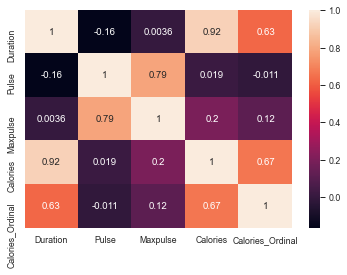

In [86]:
# set the general style of the plots
sns.set(style='white', context='paper', palette='deep')
# print the Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)
# Visualizing correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [87]:
# print the correlation coefficient from the matrix
corr_coef = np.corrcoef(df["Duration"], df["Calories_Ordinal"])[0, 1]
print("Correlation between Duration and Calories_Ordinal:", round(corr_coef, 2))

# with t-test we check if the mean of the two groups are truly different
ttest, pval = stats.ttest_ind(df["Duration"], df["Calories_Ordinal"])
print("Independent t-test 0:", ttest, pval)

Correlation between Duration and Calories_Ordinal: 0.63
Independent t-test 0: 18.34304870226138 5.928840895158504e-52


Text(0.5, 1.0, 'Independent T-Test')

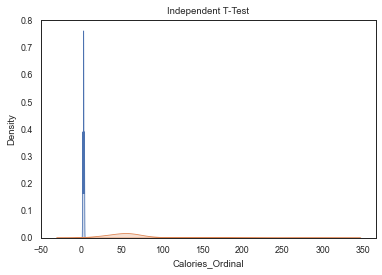

In [88]:
sns.kdeplot(df["Calories_Ordinal"], shade=True)
sns.kdeplot(df["Duration"], shade=True)
plt.title("Independent T-Test")

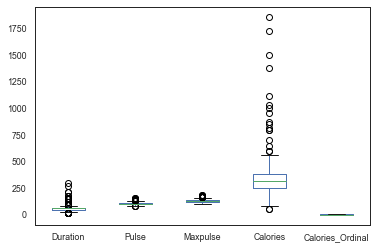

In [89]:
#Boxplot graph of all columns
df.plot(kind='box')
plt.show()

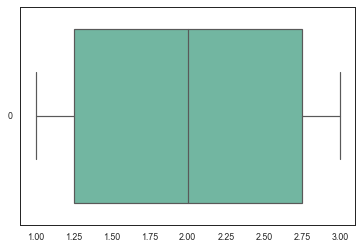

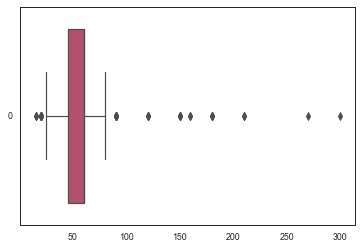

In [90]:
#Distribution of data in each class
cals_ord = df["Calories_Ordinal"]
durs = df["Duration"]

ax = sns.boxplot(data=cals_ord, orient="h", palette="Set2")
plt.show()
ax = sns.boxplot(data=durs, orient="h", palette="flare")
plt.show()

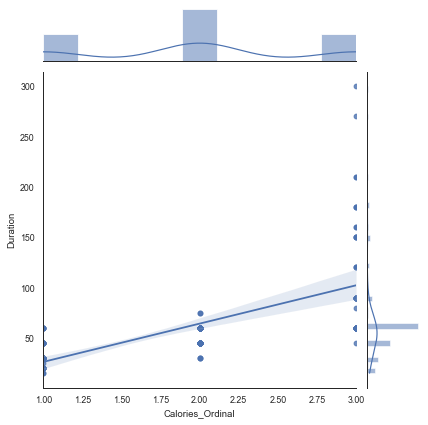

In [91]:
#Analysing correlation between Calories and Duration
sns.jointplot(kind="reg", x="Calories_Ordinal", y="Duration", data=df)
plt.show()